In [1]:
import collections
from collections import OrderedDict
import pandas as pd
import time as tm

In [2]:
run -i "windows_door_algorithm.py"

# Example 1: Run thousands of data points

First showcase running thousands of data points, which represent some counter values from a software system.

In [3]:
data_size = 500
compressor = WindowsDoorCompression(data_size)

In [4]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

for index, row in df.iterrows():
    data[index] = row['Counter']

In [5]:
t0 = tm.time()

exception = compressor._run_exception(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(exception), "data points remaining"))

Initial deviation: 131.37307661595008
0.05642819404602051  seconds time elapsed in running exception.
5960 number of data points discarded as part of exception window
510 data points remaining


In [6]:
exception_modified = {}

for time, value in exception.items():
    exception_modified[time] = [time, value]

exception_df = pd.DataFrame.from_dict(exception_modified, orient='index')
exception_df.columns = ['Date', 'Counter']
exception_df.set_index('Date', inplace=True)

In [7]:
t0 = tm.time()

compression = compressor._run_compression(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(compression)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(compression), "data points remaining"))

Initial deviation: 131.37307661595008
0.10637903213500977  seconds time elapsed in running exception.
5970 number of data points discarded as part of exception window
500 data points remaining


In [8]:
compression_modified = {}

for time, value in compression.items():
    compression_modified[time] = [time, value]
    
compression_df = pd.DataFrame.from_dict(compression_modified, orient='index')
compression_df.columns = ['Date', 'Counter']
compression_df.set_index('Date', inplace=True)

In [9]:
t0 = tm.time()

hybrid = compressor._run_hybrid(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 131.37307661595008
0.11146306991577148  seconds time elapsed in running exception.
5970 number of data points discarded as part of exception window
500 data points remaining


In [10]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'inf', 'datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


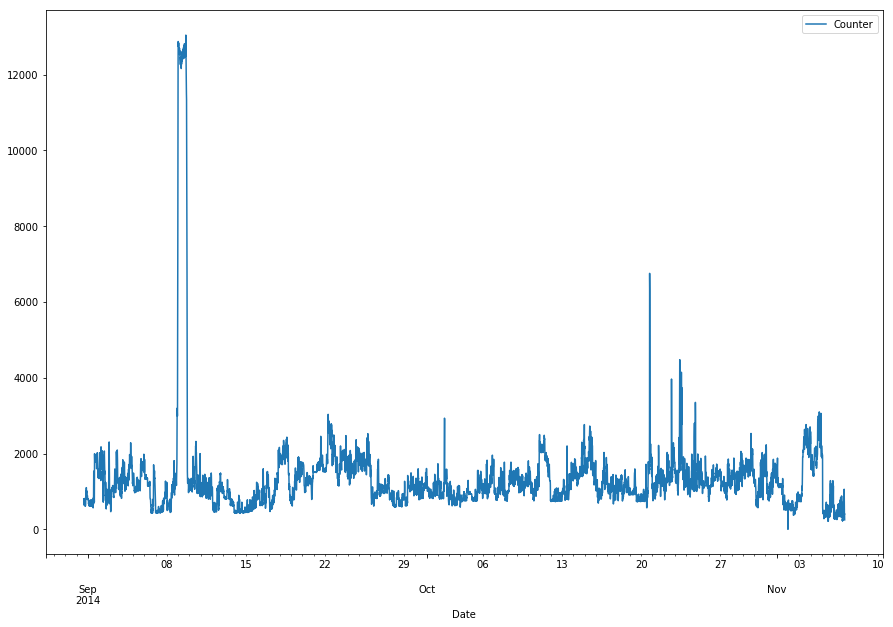

In [11]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


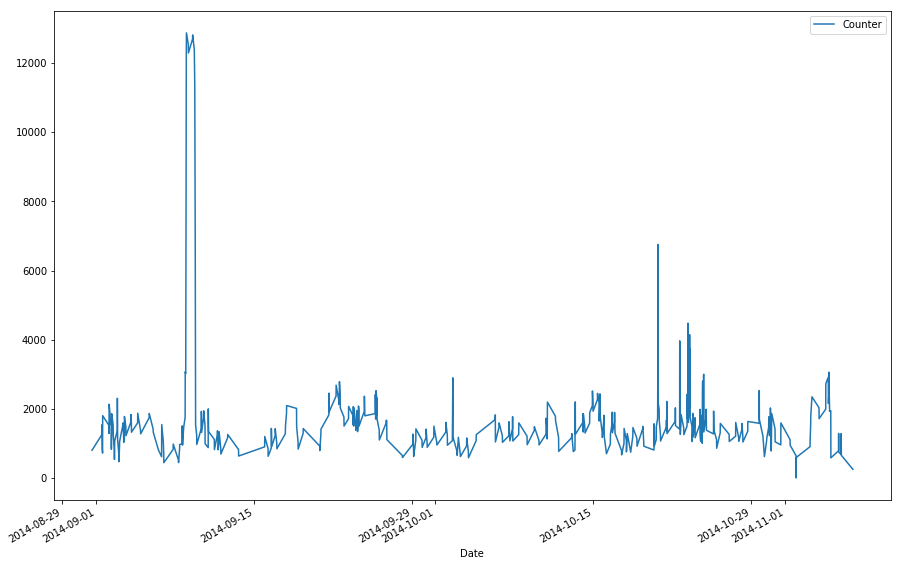

In [12]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
exception_df.plot()

Populating the interactive namespace from numpy and matplotlib


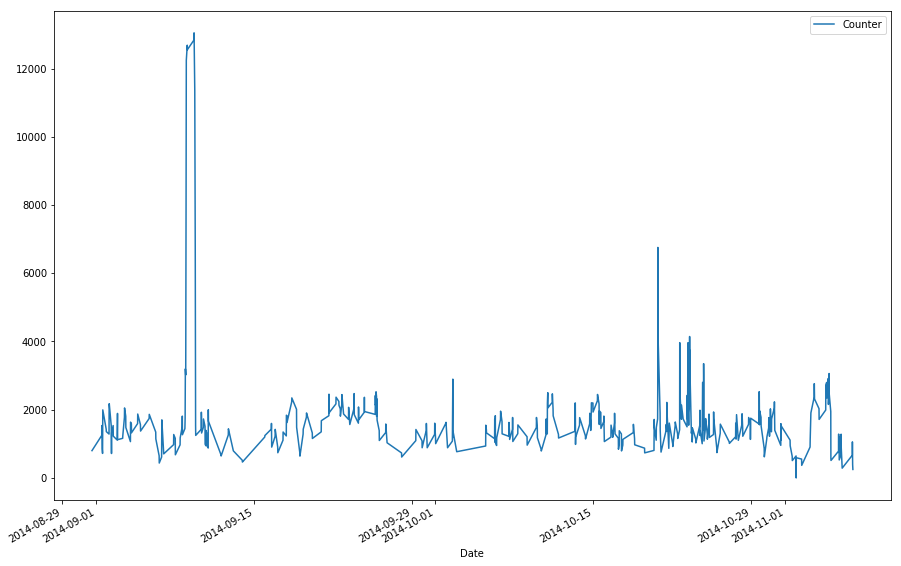

In [13]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
compression_df.plot()

Populating the interactive namespace from numpy and matplotlib


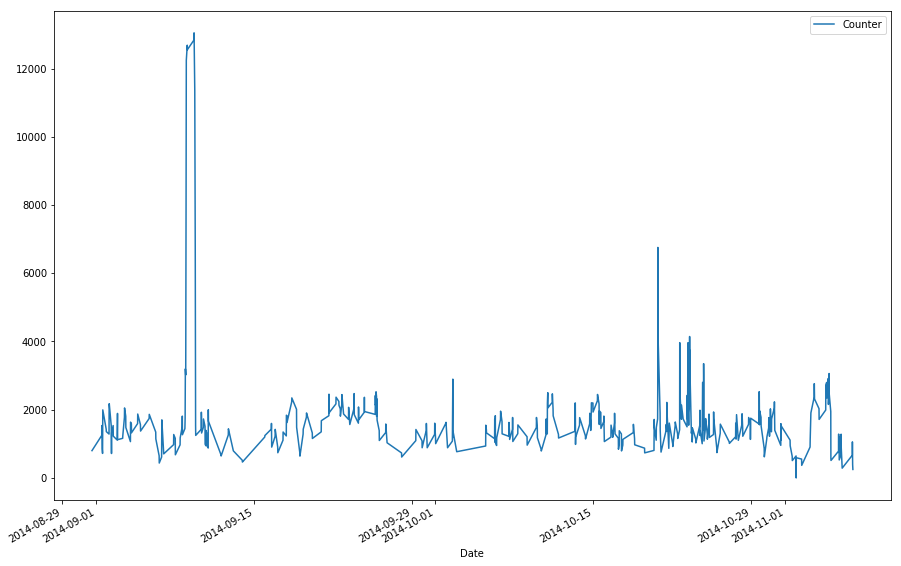

In [14]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 2: Run tens of data points

Second showcase tens of float data points.

In [15]:
data_size = 30
compressor = WindowsDoorCompression(data_size)

In [16]:
df = pd.read_csv('data/sample2.csv', parse_dates=True, index_col=0)
df['Value'] = df['Value'].astype(float)
data = {}
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

for index, row in df.iterrows():
    data[index] = row['Value']

In [17]:
t0 = tm.time()

exception = compressor._run_exception(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(exception), "data points remaining"))

Initial deviation: 1.2070796028048498
0.0013260841369628906  seconds time elapsed in running exception.
38 number of data points discarded as part of exception window
33 data points remaining


In [18]:
exception_modified = {}

for time, value in exception.items():
    exception_modified[time] = [time, value]

exception_df = pd.DataFrame.from_dict(exception_modified, orient='index')
exception_df.columns = ['Date', 'Counter']
exception_df.set_index('Date', inplace=True)

In [19]:
t0 = tm.time()

compression = compressor._run_compression(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(compression)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(compression), "data points remaining"))

Initial deviation: 1.2070796028048498
0.002332925796508789  seconds time elapsed in running exception.
42 number of data points discarded as part of exception window
29 data points remaining


In [20]:
compression_modified = {}

for time, value in compression.items():
    compression_modified[time] = [time, value]
    
compression_df = pd.DataFrame.from_dict(compression_modified, orient='index')
compression_df.columns = ['Date', 'Counter']
compression_df.set_index('Date', inplace=True)

In [21]:
t0 = tm.time()

hybrid = compressor._run_hybrid(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 1.2070796028048498
0.0023050308227539062  seconds time elapsed in running exception.
42 number of data points discarded as part of exception window
29 data points remaining


In [22]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


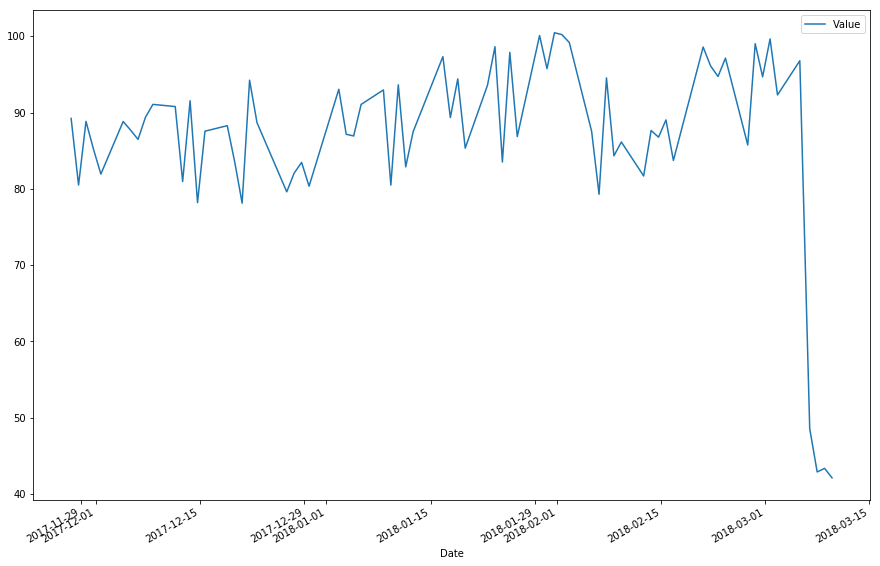

In [23]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


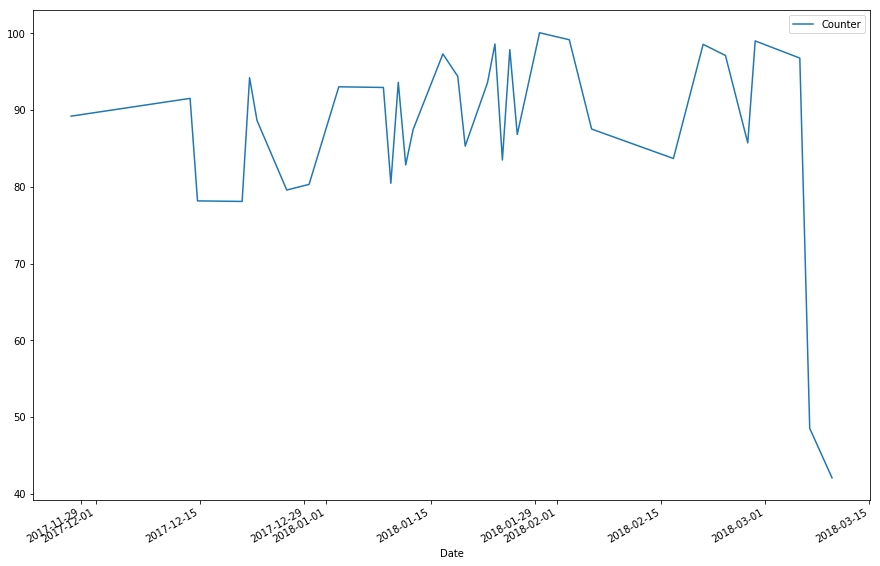

In [24]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
exception_df.plot()

Populating the interactive namespace from numpy and matplotlib


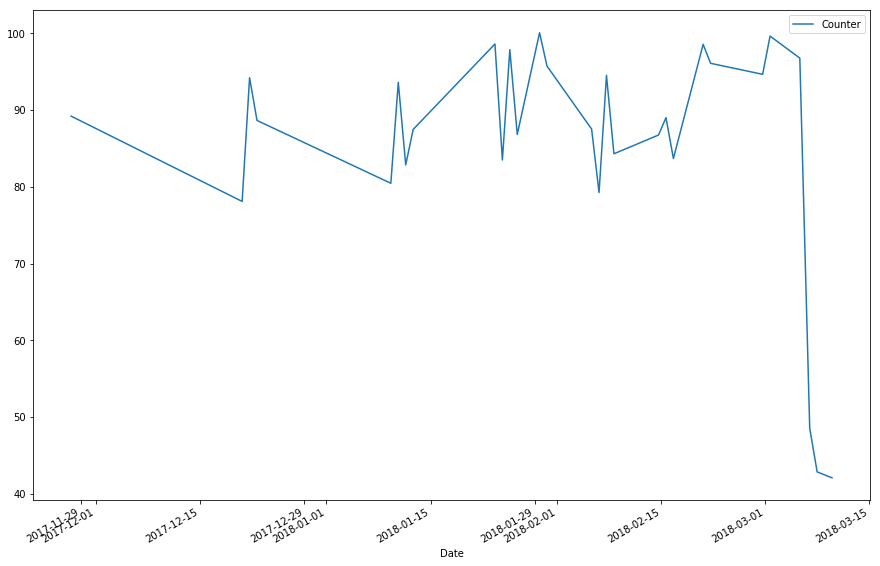

In [25]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
compression_df.plot()

Populating the interactive namespace from numpy and matplotlib


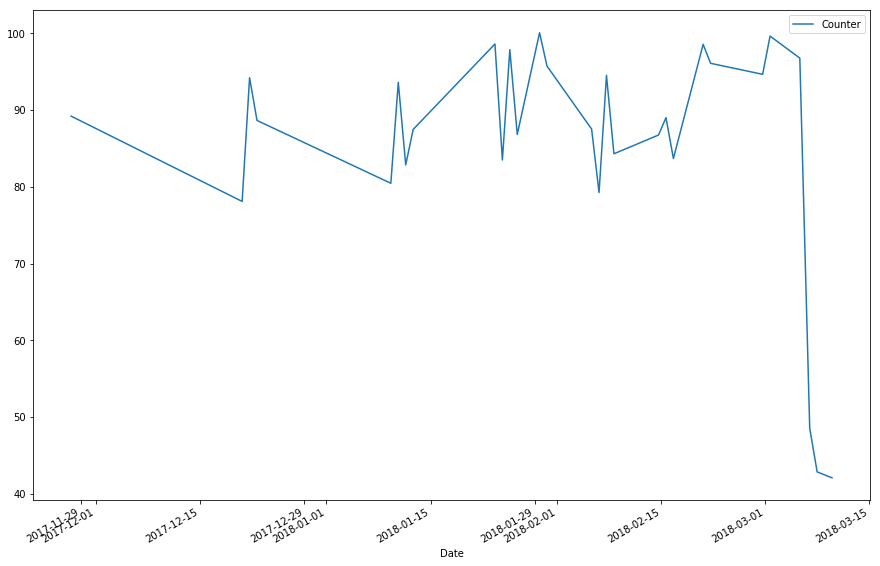

In [26]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 3: Run millions of data points

Third showcase large dataset, random generated from excel with some range.

In [27]:
data_size = 500
compressor = WindowsDoorCompression(data_size)

In [28]:
df = pd.read_csv('data/sample3.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

for index, row in df.iterrows():
    data[index] = row['Counter']

In [29]:
t0 = tm.time()

exception = compressor._run_exception(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(exception), "data points remaining"))

Initial deviation: 3724.571707649736
2  iteration:  468167  data points remaining. 
3  iteration:  69693  data points remaining. 
8.713465690612793  seconds time elapsed in running exception.
958110 number of data points discarded as part of exception window
8 data points remaining


In [30]:
exception_modified = {}

for time, value in exception.items():
    exception_modified[time] = [time, value]

exception_df = pd.DataFrame.from_dict(exception_modified, orient='index')
exception_df.columns = ['Date', 'Counter']
exception_df.set_index('Date', inplace=True)

In [31]:
t0 = tm.time()

compression = compressor._run_compression(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(compression)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(compression), "data points remaining"))

Initial deviation: 3724.571707649736
2  iteration:  638202  data points remaining. 
3  iteration:  348054  data points remaining. 
50.27887010574341  seconds time elapsed in running exception.
957718 number of data points discarded as part of exception window
400 data points remaining


In [32]:
compression_modified = {}

for time, value in compression.items():
    compression_modified[time] = [time, value]
    
compression_df = pd.DataFrame.from_dict(compression_modified, orient='index')
compression_df.columns = ['Date', 'Counter']
compression_df.set_index('Date', inplace=True)

In [33]:
t0 = tm.time()

hybrid = compressor._run_hybrid(data)

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 3724.571707649736
2  iteration:  468167  data points remaining. 
3  iteration:  69693  data points remaining. 
10.9742431640625  seconds time elapsed in running exception.
957634 number of data points discarded as part of exception window
484 data points remaining


In [34]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


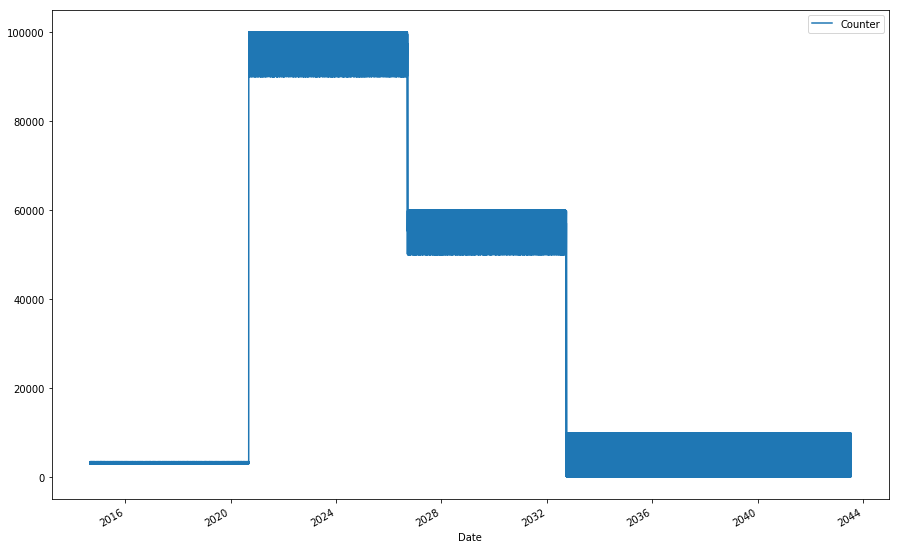

In [35]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


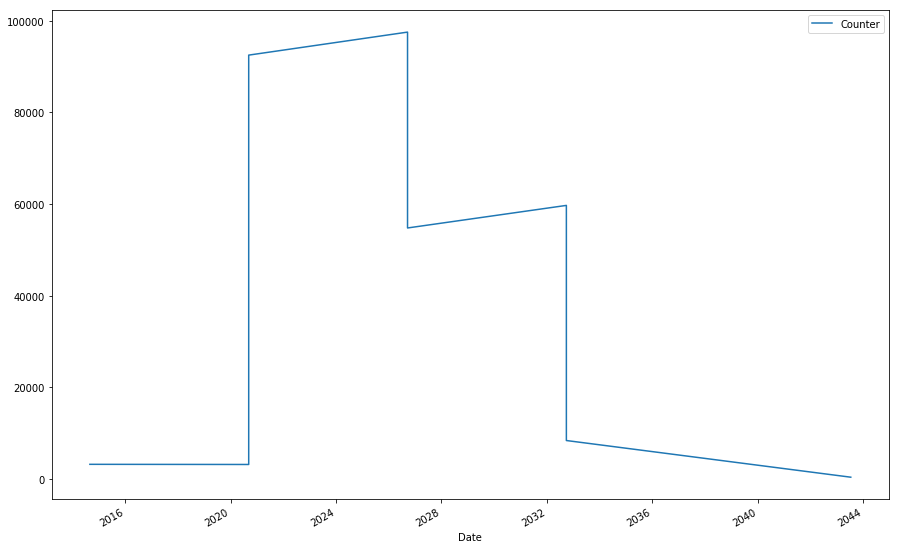

In [36]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
exception_df.plot()

Populating the interactive namespace from numpy and matplotlib


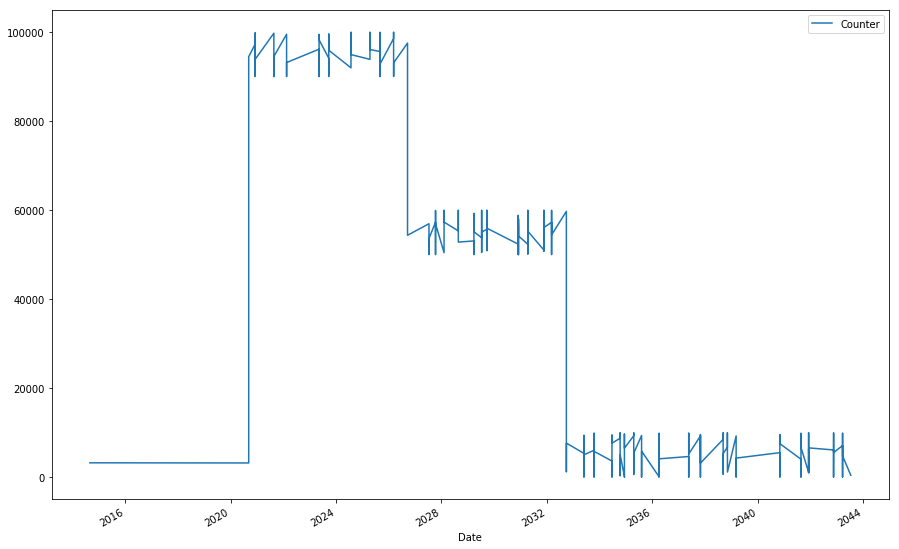

In [37]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
compression_df.plot()

Populating the interactive namespace from numpy and matplotlib


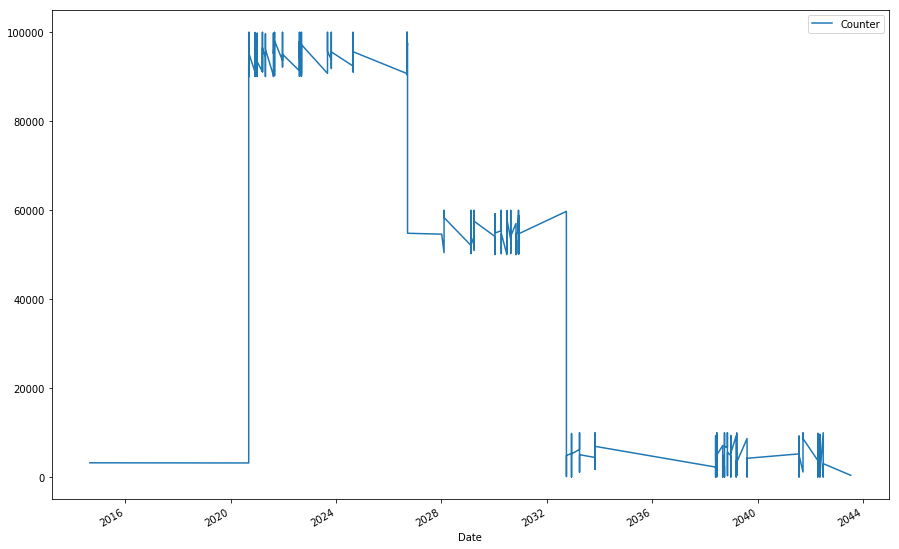

In [38]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()